In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

In [2]:
df1 = pd.read_csv('C:\\C NEW\\30Days_EDAChallenege\\datasets\\Google-Playstore.csv')

In [3]:
df1

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,...,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,...,http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,...,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,...,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [20]:
unique_apps = df1['App Name'].nunique()
print(f"Number of unique applications: {unique_apps}")

Number of unique applications: 2177943


In [22]:
unique_categories = df1['Category'].unique()
print(f"Unique categories: {unique_categories}")

Unique categories: ['Adventure' 'Tools' 'Productivity' 'Communication' 'Social'
 'Libraries & Demo' 'Lifestyle' 'Personalization' 'Racing'
 'Maps & Navigation' 'Travel & Local' 'Food & Drink' 'Books & Reference'
 'Medical' 'Puzzle' 'Entertainment' 'Arcade' 'Auto & Vehicles'
 'Photography' 'Health & Fitness' 'Education' 'Shopping' 'Board'
 'Music & Audio' 'Sports' 'Beauty' 'Business' 'Educational' 'Finance'
 'News & Magazines' 'Casual' 'Art & Design' 'House & Home' 'Card' 'Events'
 'Trivia' 'Weather' 'Strategy' 'Word' 'Video Players & Editors' 'Action'
 'Simulation' 'Music' 'Dating' 'Role Playing' 'Casino' 'Comics'
 'Parenting']


In [24]:
rating_range = (df1['Rating'].min(), df1['Rating'].max())
print(f"Range of ratings: {rating_range}")

Range of ratings: (0.0, 5.0)


In [26]:
free_apps = df1[df1['Free'] == True].shape[0]
paid_apps = df1[df1['Free'] == False].shape[0]
print(f"Number of free apps: {free_apps}")
print(f"Number of paid apps: {paid_apps}")

Number of free apps: 2267876
Number of paid apps: 45068


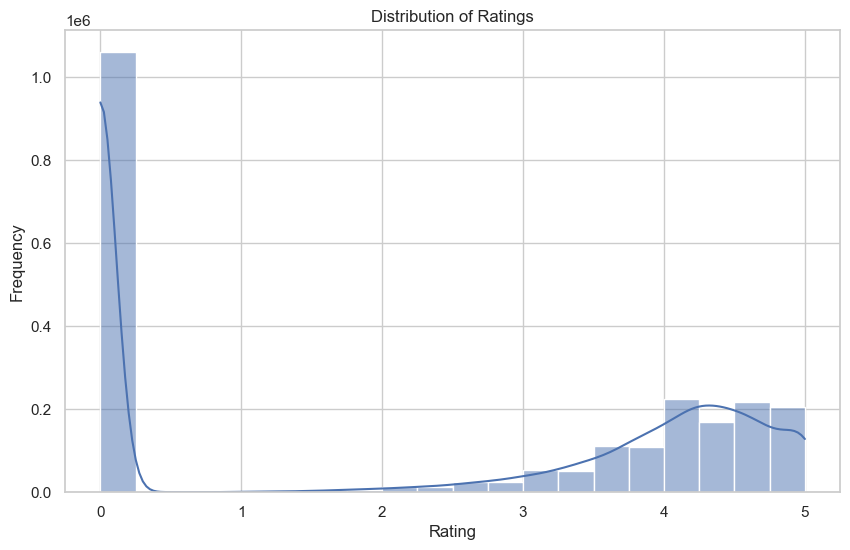

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [29]:
average_rating = df1['Rating'].mean()
print(f"Average rating: {average_rating}")

Average rating: 2.203151531771424


In [32]:
plt.figure(figsize=(40, 15))
sns.histplot(df1['Installs'], bins=20, kde=True)
plt.title('Distribution of Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Frequency')
plt.show()